<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/MACHINE_LEARNING_BREAST_CANCER_WISCONSIN_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BREAST CANCER WISCONSIN

Descripción del conjunto de datos "Breast Cancer Wisconsin":
El conjunto de datos Breast Cancer Wisconsin contiene información sobre 569 muestras de cáncer de mama, cada una con 30 características que describen propiedades de células en imágenes de biopsias. El objetivo es predecir si el tumor es benigno o maligno basándose en estas características.

Estructura del dataset:
30 características numéricas que describen propiedades del tumor.
2 clases (benigno o maligno).

In [ ]:
#carga de paquetes
import numpy as np  # Librería para operaciones matemáticas y arrays
import pandas as pd  # Importa pandas para manipulación y análisis de datos
import seaborn as sns  # Seaborn para visualización estadística
import matplotlib.pyplot as plt  # Matplotlib para crear gráficos
from sklearn.model_selection import train_test_split  # Función para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Escalador estándar para normalizar los datos
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas para evaluar el modelo


In [ ]:
from sklearn.datasets import load_breast_cancer  # Importa la función para cargar el dataset Breast Cancer de sklearn
data = load_breast_cancer()  # Carga el dataset Breast Cancer y lo asigna a la variable 'data'
df = pd.DataFrame(data.data, columns=data.feature_names)  # Convierte los datos de características en un DataFrame de pandas
df['target'] = data.target  # Añade la columna 'target' al DataFrame con las etiquetas de las clases (benigno o maligno)

# Mapea las etiquetas numéricas de 'target' a los nombres de las clases
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

In [ ]:
# Exploración inicial
display(df.head())  # Muestra las primeras 5 filas del DataFrame para una vista previa rápida
print(df.info())  # Muestra información general sobre el DataFrame (como el tipo de datos y los valores nulos)
print(df.describe())  # Muestra estadísticas descriptivas de las columnas numéricas del DataFrame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

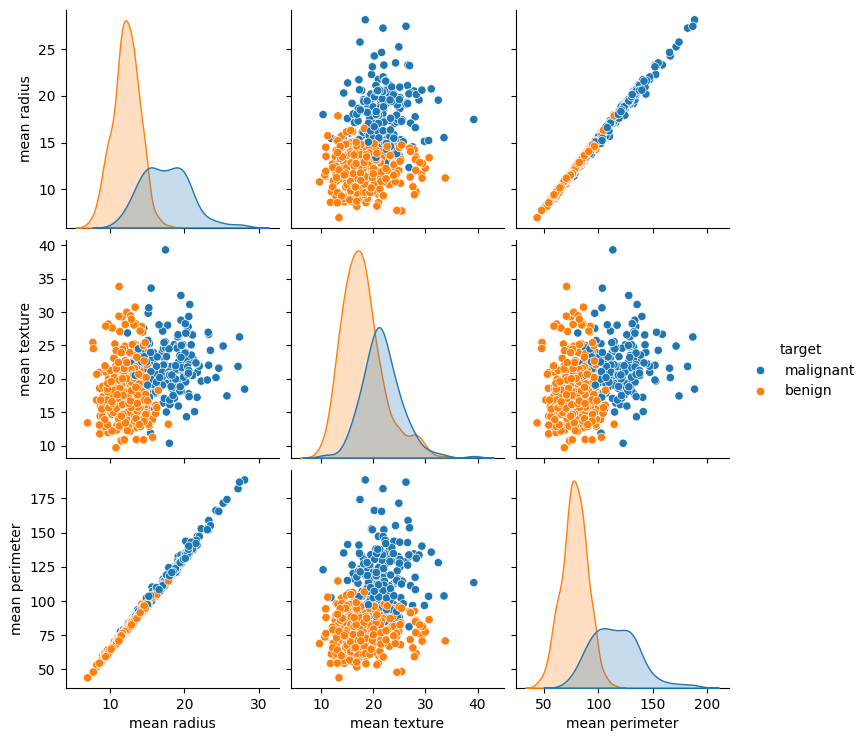

In [ ]:
# Visualización de datos
# Lista de columnas a visualizar (por ejemplo, limitando a solo 3 características)
columnas_a_mostrar = ['mean radius', 'mean texture', 'mean perimeter']
# Crear un gráfico de pares solo para las columnas seleccionadas
sns.pairplot(df, hue='target', vars=columnas_a_mostrar)
plt.show()  # Muestra el gráfico generado

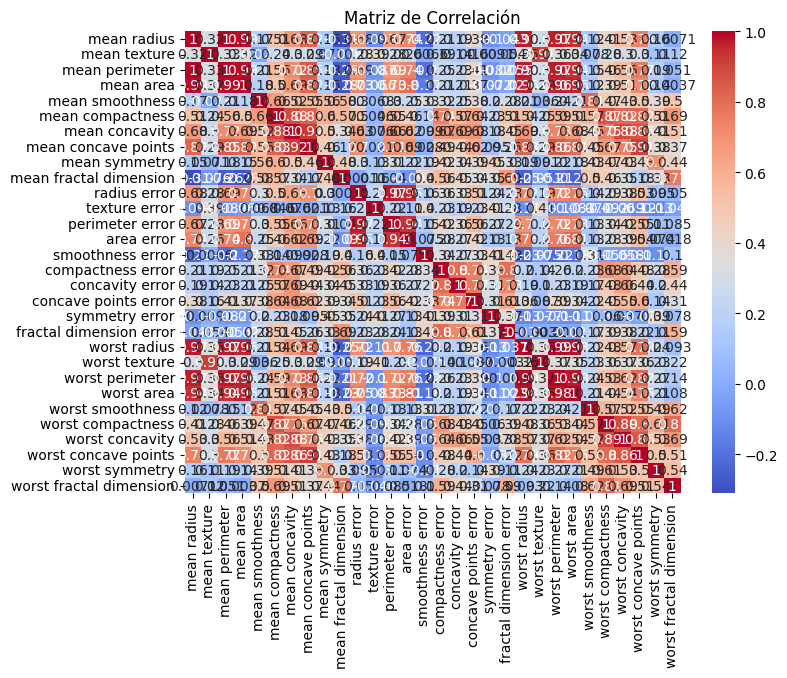

In [ ]:
# Correlación entre variables
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura para el gráfico
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Crea un mapa de calor de la matriz de correlación entre las variables numéricas
plt.title("Matriz de Correlación")  # Añade un título al gráfico
plt.show()  # Muestra el gráfico generado

In [ ]:
# División en conjunto de entrenamiento y prueba
X = df.drop(columns=['target'])  # Elimina la columna 'target' para obtener las características (X)
y = df['target']  # Asigna la columna 'target' como las etiquetas (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)

In [ ]:
# Estandarización de datos
scaler = StandardScaler()  # Crea una instancia del escalador para normalizar los datos
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta el escalador a los datos de entrenamiento y los escala
X_test_scaled = scaler.transform(X_test)  # Escala los datos de prueba usando el mismo escalador ajustado

In [ ]:
# Modelo de Regresión Logística
model = LogisticRegression(max_iter=200)  # Crea una instancia del modelo de regresión logística con clasificación binaria y 200 iteraciones
model.fit(X_train_scaled, y_train)  # Entrena el modelo utilizando los datos de entrenamiento escalados
y_pred = model.predict(X_test_scaled)  # Realiza predicciones sobre los datos de prueba escalados

In [ ]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))  # Imprime la precisión del modelo al comparar las predicciones con las etiquetas reales
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))  # Imprime un reporte con métricas como precisión, recall y f1-score para cada clase
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))  # Imprime la matriz de confusión para evaluar el desempeño del modelo

Accuracy: 0.9736842105263158

Reporte de clasificación:
               precision    recall  f1-score   support

      benign       0.97      0.99      0.98        71
   malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Matriz de confusión:
 [[70  1]
 [ 2 41]]
